In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
 
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Data/train.csv')

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Data/test.csv')

 **On les combine pour faire certaines d'analyse des deux a la fois**

In [ ]:
 combine = [train_df, test_df]

##afficher toutes les noms de colonnes que contient notre bdd

In [ ]:
 print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


##type de variable##
Catégoriques et numériques

In [ ]:
 train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

In [ ]:
 
#afficher les dernières lignes 
 train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Quelles sont les colonnes qui contiennent des valeurs vide, nulle,...##
## Quelles sont les types de variables ##

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
 train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## la distribution des variables catégoriques ##

In [ ]:
 train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gavey, Mr. Lawrence",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


 ## corrélation ##
On va vérifier la corrélation des colonnes avec Survived

## A compléter ##
On va compléter la colonne ##âge## et la colonne ## embarquée ## car elles ont la relation avec la colonne survie

 ## A supprimer ##
1 cabinet 
2 ticket 
3 nom
4 passagerId

## A créé ##
1) Une colonne famille, donc on va garder les nom dans un premier temps.
2) Une colonne Tranche d'âge , Cela transforme une caractéristique numérique continue en un ordinal.
3) Une colonne gamme Tarif, celle là peut être va nous aider à faire l'analyse

 ## Classifier##
 
 Nous pouvons également ajouter à nos hypothèses sur la base de la description du problème mentionnée précédemment.
 
 Les femmes (sexe = femme) étaient plus susceptibles d'avoir survécu.
 Les enfants (âge <?) Étaient plus susceptibles d'avoir survécu.
 Les passagers de la classe supérieure (classe P = 1) étaient plus susceptibles d'avoir survécu.

In [ ]:
 train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


On peut utiliser cette fonctionnalité sauf uniquement aux colonnes qui ne contient pas de valeurs vides.

In [ ]:
 train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
 train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
 train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


##Analyser en visualisant les données##
 
 Nous pouvons maintenant continuer à confirmer certaines de nos hypothèses en utilisant des visualisations pour analyser les données.

 Corréler les caractéristiques numériques¶
 Commençons par comprendre les corrélations entre les caractéristiques numériques et notre objectif de solution (survécu).
 
 Un histogramme est utile pour analyser des variables numériques continues comme l'âge où les bandes ou les plages aideront à identifier des modèles utiles.  L'histogramme peut indiquer la distribution des échantillons en utilisant des bacs définis automatiquement ou des bandes à égale distance.  Cela nous aide à répondre aux questions relatives à des bandes spécifiques (les nourrissons ont-ils eu un meilleur taux de survie?)
 
 Notez que l'axe des x dans les visualisations d'historgramme représente le nombre d'échantillons ou de passagers

 ## Observations ##
 
 Les nourrissons (âge <= 4) avaient un taux de survie élevé.
 Les passagers les plus âgés (âge = 80) ont survécu.
 Un grand nombre d'enfants de 15 à 25 ans n'ont pas survécu.
 La plupart des passagers ont entre 15 et 35 ans.

 ## Décisions##
 
 Cette analyse simple confirme nos hypothèses en tant que décisions pour les étapes ultérieures du flux de travail.
 
 Nous devrions considérer l'âge (notre hypothèse classant # 2) dans notre formation de modèle.
 Complétez la fonction Âge pour les valeurs nulles (complétant # 1).
 Nous devrions regrouper les groupes d'âge (en créant le n ° 3).

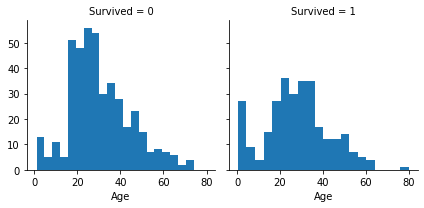

In [ ]:
 g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


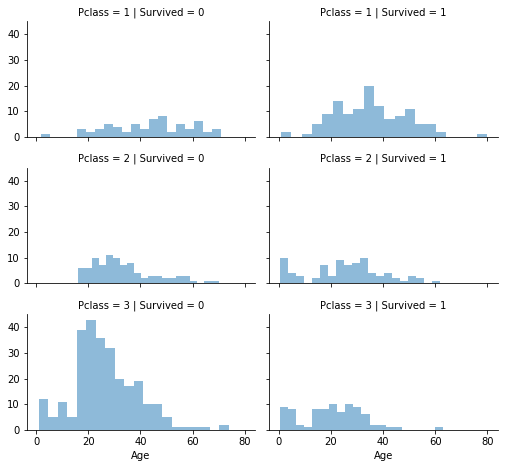

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

 ## Observations ##
 
 Pclass = 3 avait la plupart des passagers, mais la plupart n'ont pas survécu.  Confirme notre hypothèse de classification n ° 2.
 Les passagers en bas âge en classe P = 2 et en classe P = 3 ont pour la plupart survécu.  Précise davantage notre hypothèse de classification n ° 2.
 La plupart des passagers de la classe P = 1 ont survécu.  Confirme notre hypothèse de classification n ° 3.
 La classe P varie en termes de répartition par âge des passagers.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


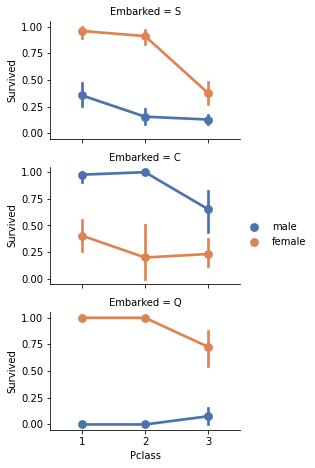

In [ ]:
 grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

 Corréler les fonctionnalités catégorielles¶
 Nous pouvons désormais corréler les fonctionnalités catégorielles avec notre objectif de solution.

## Observations##
 
 Les passagers féminins avaient un taux de survie bien meilleur que les hommes.  Confirme la classification (# 1).
 Exception dans Embarqué = C où les hommes avaient un taux de survie plus élevé.  Cela pourrait être une corrélation entre Pclass et Embarked et à son tour Pclass et Survived, pas nécessairement une corrélation directe entre Embarked et Survived.
 Les mâles avaient un meilleur taux de survie dans la classe P = 3 par rapport à la classe P = 2 pour les ports C et Q.  Terminer (# 2).
 Les ports d'embarquement ont des taux de survie variables pour la classe P = 3 et parmi les passagers masculins.  Corrélation (# 1).

 ## Les décisions##
 
 Ajoutez la fonction Sex à la formation du modèle.
 Terminez et ajoutez la fonction Embarqué à la formation du modèle.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


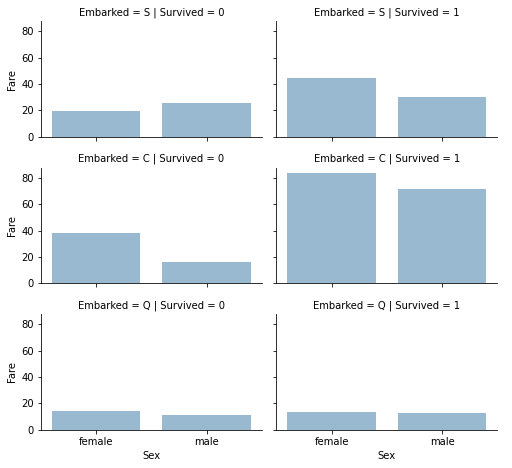

In [ ]:
 grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

 ## Corréler les caractéristiques catégoriques et numériques ##
 Nous pouvons également vouloir mettre en corrélation des caractéristiques catégorielles (avec des valeurs non numériques) et des caractéristiques numériques.  Nous pouvons envisager de corréler Embarqué (catégorique non numérique), sexe (catégorique non numérique), tarif (numérique continu), avec survécu (catégorique numérique).

## Observations##
 
 Les passagers payant des tarifs plus élevés avaient une meilleure survie.  Confirme notre hypothèse de création de fourchettes tarifaires (# 4).
 Le port d'embarquement est en corrélation avec les taux de survie.  Confirme la corrélation (# 1) et l'achèvement (# 2).

## Les décisions.
 
 Envisagez la fonction de tarif de bande.

 ## Wrangle données
 Nous avons recueilli plusieurs hypothèses et décisions concernant nos ensembles de données et les exigences de nos solutions.  Jusqu'à présent, nous n'avons pas eu à modifier une seule fonctionnalité ou valeur pour y parvenir.  Exécutons maintenant nos décisions et hypothèses pour corriger, créer et réaliser des objectifs.
 
## Correction en supprimant des fonctionnalités
 C'est un bon objectif de départ à exécuter.  En supprimant des fonctionnalités, nous traitons moins de points de données.  Accélère notre cahier et facilite l'analyse.
 
 Sur la base de nos hypothèses et décisions, nous voulons supprimer les fonctionnalités Cabin (correction n ° 2) et Ticket (correction n ° 1).
 
 Notez que, le cas échéant, nous effectuons ensemble des opérations sur les ensembles de données d'entraînement et de test pour rester cohérents.

In [ ]:
 print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
 
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
 
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [ ]:
 for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
 
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


## Créer une nouvelle fonctionnalité extraire de l'existant
 Nous voulons analyser si la fonctionnalité Nom peut être conçue pour extraire les titres et tester la corrélation entre les titres et la survie, avant d'abandonner les fonctionnalités Name et PassengerId.
 
 Dans le code suivant, nous extrayons la fonction Title à l'aide d'expressions régulières.  Le modèle RegEx (\ w + \.) Correspond au premier mot qui se termine par un caractère point dans la fonction Nom.  L'indicateur expand = False renvoie un DataFrame.
 
 
## Observations.
 
 Lorsque nous traçons le titre, l'âge et survécu, nous pouvons noter les systèmes suivants.
 
 La plupart des titres regroupent les groupes d'âge avec précision.  Par exemple: le titre principal a une moyenne d'âge de 5 ans.
 La survie parmi les tranches d'âge du titre varie légèrement.
 Certains titres ont pour la plupart survécu (Mme, Lady, Sir) ou pas (Don, Rev, Jonkheer).
## Décision.
 
 Nous décidons de conserver la nouvelle fonctionnalité Titre pour la formation des modèles.

 Nous pouvons remplacer de nombreux titres par un nom plus courant ou les classer comme Rare.

In [ ]:
 for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


 Nous pouvons convertir les titres catégoriels en ordinaux.

In [ ]:
 title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


 Nous pouvons désormais supprimer en toute sécurité la fonctionnalité Nom des ensembles de données d'entraînement et de test.  Nous n'avons pas non plus besoin de la fonctionnalité PassengerId dans le jeu de données d'entraînement.

In [ ]:
 train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## Conversion d'une fonctionnalité catégorielle
 Nous pouvons maintenant convertir les entités contenant des chaînes en valeurs numériques.  Ceci est requis par la plupart des algorithmes de modèle.  Cela nous aidera également à atteindre l'objectif de réalisation des fonctionnalités.
 
 Commençons par convertir la fonctionnalité Sexe en une nouvelle fonctionnalité appelée Sexe où femme = 1 et homme = 0.

In [ ]:
 for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,S,1
414,1306,1,1,39.0,0,0,108.9000,C,5
415,1307,3,0,38.5,0,0,7.2500,S,1
416,1308,3,0,NaN,0,0,8.0500,S,1


 ## Remplacer les valeurs manquantes ou nulles 
 Nous devrions maintenant commencer à estimer et compléter les fonctionnalités avec des valeurs manquantes ou nulles.  Nous allons d'abord faire cela pour la fonction Age.
 
 Nous pouvons envisager trois méthodes pour compléter une entité numérique continue.
 
 1)Un moyen simple consiste à générer des nombres aléatoires entre la moyenne et l'écart type.
 
 2)Un moyen plus précis de deviner les valeurs manquantes consiste à utiliser d'autres fonctionnalités corrélées.  Dans notre cas, nous notons une corrélation entre l'âge, le sexe et la classe P.  Devinez les valeurs de l'âge à l'aide des valeurs médianes de l'âge dans les ensembles de combinaisons de caractéristiques Pclasse et Sexe.  Ainsi, l'âge médian pour la classe P = 1 et le sexe = 0, la classe P = 1 et le sexe = 1, et ainsi de suite ...
 
3) Combinez les méthodes 1 et 2. Ainsi, au lieu de deviner les valeurs d'âge basées sur la médiane, utilisez des nombres aléatoires entre la moyenne et l'écart type, basés sur des ensembles de combinaisons Pclasse et Genre.
 
 Les méthodes 1 et 3 introduiront un bruit aléatoire dans nos modèles.  Les résultats de plusieurs exécutions peuvent varier.  Nous préférerons la méthode 2.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


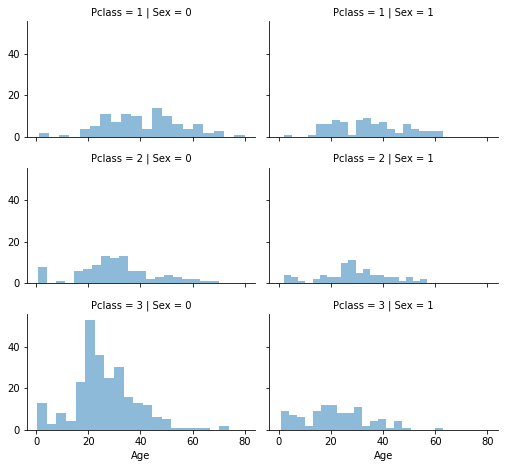

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

 Commençons par préparer un tableau vide pour contenir des valeurs d'âge devinées basées sur des combinaisons Pclasse x Genre.

In [ ]:
 guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

 Maintenant, nous parcourons le sexe (0 ou 1) et la classe P (1, 2, 3) pour calculer les valeurs estimées de l'âge pour les six combinaisons.

In [ ]:
 for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
 
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
 
            age_guess = guess_df.median()
 
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
 
    dataset['Age'] = dataset['Age'].astype(int)
 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


 Créons des tranches d'âge et déterminons les corrélations avec Survived.

In [ ]:
 train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


 Remplaçons Age par des ordinaux basés sur ces bandes

In [ ]:
 for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


 Nous ne pouvons pas supprimer la fonctionnalité AgeBand

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1


In [ ]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1


##  Créer une nouvelle fonctionnalité combinant des fonctionnalités existantes
 Nous pouvons créer une nouvelle fonctionnalité pour FamilySize qui combine Parch et SibSp.  Cela nous permettra de supprimer Parch et SibSp de nos ensembles de données.

In [ ]:
 for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
 
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


 Nous pouvons créer une autre fonctionnalité appelée IsAlone.

In [ ]:
 for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
 
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


 Laissons tomber les fonctionnalités Parch, SibSp et FamilySize en faveur d'IsAlone.

In [ ]:
 train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


 Nous pouvons également créer une fonction artificielle combinant Pclass et Age.

In [ ]:
 for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
 
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Compléter une fonctionnalité catégorielle
 La fonction embarquée prend les valeurs S, Q, C en fonction du port d'embarquement.  Notre ensemble de données d'entraînement a deux valeurs manquantes.  Nous les remplissons simplement avec l'occurrence la plus courante.

In [ ]:
 freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
 for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Conversion d'une fonctionnalité catégorielle en numérique
 Nous pouvons maintenant convertir la fonctionnalité EmbarkedFill en créant une nouvelle fonctionnalité de port numérique

In [ ]:
 for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## Compléter et convertir rapidement une fonction numérique
 Nous pouvons maintenant compléter la fonctionnalité Fare pour une seule valeur manquante dans l'ensemble de données de test en utilisant le mode pour obtenir la valeur qui se produit le plus fréquemment pour cette fonctionnalité.  Nous faisons cela en une seule ligne de code.
 
 Notez que nous ne créons pas de nouvelle fonctionnalité intermédiaire ou ne faisons aucune analyse supplémentaire pour la corrélation pour deviner la fonctionnalité manquante car nous ne remplaçons qu'une seule valeur.  L'objectif d'achèvement répond aux exigences souhaitées pour que l'algorithme du modèle fonctionne sur des valeurs non nulles.
 
 Nous pouvons également arrondir le tarif à deux décimales car il représente la monnaie.

In [ ]:
 test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


 Nous ne pouvons pas créer FareBand.

In [ ]:
 train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


 Convertissez la fonction Fare en valeurs ordinales basées sur la bande tarifaire.

In [ ]:
 for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
 
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## Modéliser, prédire et résoudre
 Nous sommes maintenant prêts à entraîner un modèle et à prédire la solution requise.  Vous avez le choix entre plus de 60 algorithmes de modélisation prédictive.  Nous devons comprendre le type de problème et l'exigence de solution pour nous limiter à quelques modèles sélectionnés que nous pouvons évaluer.  Notre problème est un problème de classification et de régression.  Nous voulons identifier la relation entre la sortie (survécu ou non) avec d'autres variables ou caractéristiques (sexe, âge, port ...).  Nous développons également une catégorie d'apprentissage automatique qui est appelée apprentissage supervisé car nous entraînons notre modèle avec un ensemble de données donné.  Avec ces deux critères - apprentissage supervisé plus classification et régression, nous pouvons restreindre notre choix de modèles à quelques-uns.  Ceux-ci inclus:
 
 1)Régression logistique
 2)KNN ou k-voisins les plus proches
 3)Machines vectorielles de soutien
 4) Classificateur Naive Bayes
 5)Arbre de décision
 5)Random Forrest
 7)Perceptron
 8)Réseau neuronal artificiel
 9)RVM ou machine vectorielle de pertinence

In [ ]:
 X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## La régression logistique :
Est un modèle utile à exécuter tôt dans le flux de travail.  La régression logistique mesure la relation entre la variable dépendante catégorielle (caractéristique) et une ou plusieurs variables indépendantes (caractéristiques) en estimant les probabilités à l'aide d'une fonction logistique, qui est la distribution logistique cumulative.  Référence Wikipedia.
 
 Notez le score de confiance généré par le modèle basé sur notre ensemble de données d'entraînement

In [ ]:
 # Logistic Regression
 
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

 Nous pouvons utiliser la régression logistique pour valider nos hypothèses et décisions concernant la création de fonctionnalités et la réalisation d'objectifs.  Cela peut être fait en calculant le coefficient des caractéristiques dans la fonction de décision.
 
 Les coefficients positifs augmentent le log-odds de la réponse (et donc augmentent la probabilité), et les coefficients négatifs diminuent le log-odds de la réponse (et donc diminuent la probabilité).
 
 Le sexe est le coefficient de positivie le plus élevé, ce qui signifie que lorsque la valeur du sexe augmente (homme: 0 à femme: 1), la probabilité de survivre = 1 augmente le plus.
 À l'inverse, à mesure que la classe P augmente, la probabilité de survivre = 1 diminue le plus.
 De cette façon, la classe Âge * est une bonne caractéristique artificielle à modéliser car elle a la deuxième corrélation négative la plus élevée avec Survived.
 Il en va de même pour le titre en tant que deuxième corrélation positive la plus élevée.

In [ ]:
 # Support Vector Machines
 
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

 Dans la reconnaissance de formes, l'algorithme k-Nearest Neighbours (ou k-NN pour faire court) est une méthode non paramétrique utilisée pour la classification et la régression.  Un échantillon est classé par un vote majoritaire de ses voisins, l'échantillon étant attribué à la classe la plus courante parmi ses k voisins les plus proches (k est un entier positif, généralement petit).  Si k = 1, alors l'objet est simplement assigné à la classe de ce seul voisin le plus proche.  Référence Wikipedia.
 
 Le score de confiance KNN est meilleur que la régression logistique mais pire que SVM

In [ ]:
 knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

 Dans l'apprentissage automatique, les classificateurs de Bayes naïfs sont une famille de classificateurs probabilistes simples basés sur l'application du théorème de Bayes avec des hypothèses d'indépendance fortes (naïves) entre les caractéristiques.  Les classificateurs Naive Bayes sont hautement évolutifs, nécessitant un certain nombre de paramètres linéaires dans le nombre de variables (caractéristiques) dans un problème d'apprentissage.  Référence Wikipedia.
 
 Le score de confiance généré par le modèle est le plus bas parmi les modèles évalués jusqu'à présent.

In [ ]:
 
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

 Le perceptron est un algorithme d'apprentissage supervisé de classificateurs binaires (fonctions qui peuvent décider si une entrée, représentée par un vecteur de nombres, appartient ou non à une classe spécifique).  C'est un type de classificateur linéaire, c'est-à-dire  un algorithme de classification qui effectue ses prédictions sur la base d'une fonction de prédicteur linéaire combinant un ensemble de poids avec le vecteur de caractéristiques.  L'algorithme permet l'apprentissage en ligne, en ce sens qu'il traite les éléments de l'ensemble de formation un par un.  Référence Wikipedia.

In [ ]:
 # Perceptron
 
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [ ]:
 # Linear SVC
 
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [ ]:
 # Stochastic Gradient Descent
 
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.45

 Ce modèle utilise un arbre de décision comme modèle prédictif qui mappe des caractéristiques (branches d'arbre) à des conclusions sur la valeur cible (feuilles d'arbre).  Les modèles d'arbre dans lesquels la variable cible peut prendre un ensemble fini de valeurs sont appelés arbres de classification;  dans ces arborescences, les feuilles représentent les étiquettes de classe et les branches représentent les conjonctions d'entités qui mènent à ces étiquettes de classe.  Les arbres de décision dans lesquels la variable cible peut prendre des valeurs continues (généralement des nombres réels) sont appelés arbres de régression.  Référence Wikipedia.
 
 Le score de confiance du modèle est le plus élevé parmi les modèles évalués à ce jour.

In [ ]:
 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

 Le prochain modèle Random Forests est l'un des plus populaires.  Les forêts aléatoires ou les forêts de décision aléatoires sont une méthode d'apprentissage d'ensemble pour la classification, la régression et d'autres tâches, qui fonctionnent en construisant une multitude d'arbres de décision (n_estimators = 100) au moment de l'apprentissage et en sortant la classe qui est le mode des classes (classification) ou prédiction moyenne (régression) des arbres individuels.  Référence Wikipedia.
 
 Le score de confiance du modèle est le plus élevé parmi les modèles évalués à ce jour.  Nous décidons d'utiliser la sortie de ce modèle (Y_pred) pour créer la soumission de résultats de notre concours.

In [ ]:
 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## Évaluation du modèle
 Nous pouvons maintenant classer notre évaluation de tous les modèles pour choisir le meilleur pour notre problème.  Bien que l'Arbre de décision et la Forêt aléatoire obtiennent le même score, nous choisissons d'utiliser Random Forest car ils corrigent l'habitude des arbres de décision de sur-adapter leur ensemble d'entraînement.

In [ ]:
 models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
6,Stochastic Gradient Decent,78.45
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28


In [ ]:
 submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })